In [2]:
# PASO 1: IMPORTAR Y CARGAR DATOS

# 1. Carga y Exploracion Inicial del Dataset, importancion de libreria panda
import pandas as pd

# 2. Configuración visual, para que se muestren todas las columnas sin importar el tamaño de la tabla
pd.set_option('display.max_columns', None)

# 3. Carga del Dataset
try:
    # Lectura del archivo CSV del dataset de inpescciones a restaurantes
    df_inspecciones = pd.read_csv('Datos_Crudos/DOHMH_New_York_City_Restaurant_Inspection_Results_MANHATHAN.csv')
    
    print("DIMENSIONES DEL DATASET")    
    #Visualización de la cantidad de filas y columnas del dataset
    print(f"📊 Dimensiones {df_inspecciones.shape[0]:,} filas y {df_inspecciones.shape[1]} columnas.")
    
    # Vista Previa de las primeras 5 filas
    print("\n--- VISUALIZACIÓN DEL CONTENIDO DEL DATASET ---")
    display(df_inspecciones.head(5))
    
    # Información de las variables del dataset y su tipo de datos
    print("\n--- INFORMACIÓN DE VARIABLES ---")
    
    # Verificación de celdas y columnas vacias
    df_inspecciones.info()

except FileNotFoundError:
    print("❌ ERROR: No encuentro el archivo.")

DIMENSIONES DEL DATASET
📊 Dimensiones 108,773 filas y 27 columnas.

--- VISUALIZACIÓN DEL CONTENIDO DEL DATASET ---


,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location
0,50174792,THE PERCH,Manhattan,2,PENN PLAZA,10121.0,9179162065,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,12/18/2025,NaN,"40,75000977422","-73,99134519403",105.0,3.0,10100.0,1083026.0,1.007810e+09,MN17,POINT (-73.991345194031 40.750009774218)
1,50177336,BROWN BAG SANDWICH CO,Manhattan,64,WEST 22 STREET,10010.0,2038588732,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,12/18/2025,NaN,"40,7416794702","-73,99201028551",105.0,3.0,5800.0,1015555.0,1.008230e+09,MN13,POINT (-73.992010285509 40.741679470196)
2,50170331,SPRING,Manhattan,116,MADISON STREET,10002.0,9298557122,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,12/18/2025,NaN,"40,71223927625","-73,9949428125",103.0,1.0,800.0,1003309.0,1.002760e+09,MN27,POINT (-73.994942812495 40.712239276247)
3,50169793,ALITTLE PINK LLC,Manhattan,68,FRANKLIN STREET,10013.0,6166060658,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,12/18/2025,NaN,"40,71769591607","-74,00405474032",101.0,1.0,3300.0,1001939.0,1.001750e+09,MN24,POINT (-74.004054740315 40.717695916068)
4,50174544,CHOP & GO,Manhattan,750,AVENUE AMERICAS,NaN,2123002870,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,12/18/2025,NaN,0,0,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN



--- INFORMACIÓN DE VARIABLES ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108773 entries, 0 to 108772
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CAMIS                  108773 non-null  int64  
 1   DBA                    108773 non-null  object 
 2   BORO                   108773 non-null  object 
 3   BUILDING               108087 non-null  object 
 4   STREET                 108773 non-null  object 
 5   ZIPCODE                107050 non-null  float64
 6   PHONE                  108766 non-null  object 
 7   CUISINE DESCRIPTION    107157 non-null  object 
 8   INSPECTION DATE        108773 non-null  object 
 9   ACTION                 107157 non-null  object 
 10  VIOLATION CODE         106101 non-null  object 
 11  VIOLATION DESCRIPTION  106101 non-null  object 
 12  CRITICAL FLAG          108773 non-null  object 
 13  SCORE                  101955 non-null  float64
 14  GR

In [3]:
# PASO 2: SELECCIÓN Y LIMPIEZA DE COLUMNAS

# 1. Selección de las variables (columnas) importantes para el proyecto
lista_columnas = [
    'CAMIS',                # ID del Restaurante
    'DBA',                  # Nombre del Restaurante
    'BORO',                 # Distrito/Zona
    'BUILDING',             # Número del Edificio
    'STREET',               # Calle
    'ZIPCODE',              # Código Postal
    'Latitude',             # Coordenada Latitud
    'Longitude',            # oordenada Longitud
    'CUISINE DESCRIPTION',  # Tipo de Comida
    'INSPECTION DATE',      # Fecha Inspección
    'VIOLATION DESCRIPTION',# Descripción del problema
    'CRITICAL FLAG',        # Gravedad de la Violación en la Inspección
    'SCORE',                # Puntaje de Inspección
    'GRADE',                # Calificación Sanitaria (A,B,C,P,Z)
    'BIN'                   # ID Edificio
]

try:
    # 2. Creación del dataset de las columnas seleccionadas
    df_limpio = df_inspecciones[lista_columnas].copy()

    # 3. Renombre de las columnas seleccionadas
    df_limpio = df_limpio.rename(columns={
        'CAMIS': 'ID_RESTAURANTE',
        'DBA': 'NOMBRE_RESTAURANTE',
        'BORO': 'ZONA',
        'BUILDING': 'NUM_EDIFICIO',
        'STREET': 'CALLE',
        'ZIPCODE': 'CODIGO_POSTAL',
        'Latitude': 'LATITUD',
        'Longitude': 'LONGITUD',
        'CUISINE DESCRIPTION': 'COCINA',
        'INSPECTION DATE': 'FECHA',
        'VIOLATION DESCRIPTION': 'VIOLACION',
        'CRITICAL FLAG': 'GRAVEDAD',
        'SCORE': 'PUNTAJE',
        'GRADE': 'CALIFICACION',
        'BIN': 'ID_EDIFICIO'
    })

    # 4. Filtramos en ZONA el area de estudio ZONA="Manhathan"
    df_limpio = df_limpio[df_limpio['ZONA'] == 'Manhattan']

    # 5. Visualización del resultado del filtro
    print("✅ ¡Transformación completada!")
    print(f"📊 Nueva dimensión {df_limpio.shape[0]:,} filas y {df_limpio.shape[1]} columnas")

    print("\n--- VISUALIZACIÓN DE LA NUEVA TABLA ---")
    display(df_limpio.head())

except KeyError as e:
    print("❌ ERROR DE ESCRITURA: Python no encuentra una columna.")
    print(f"El error está en: {e}")

✅ ¡Transformación completada!
📊 Nueva dimensión 108,773 filas y 15 columnas

--- VISUALIZACIÓN DE LA NUEVA TABLA ---


,ID_RESTAURANTE,NOMBRE_RESTAURANTE,ZONA,NUM_EDIFICIO,CALLE,CODIGO_POSTAL,LATITUD,LONGITUD,COCINA,FECHA,VIOLACION,GRAVEDAD,PUNTAJE,CALIFICACION,ID_EDIFICIO
0,50174792,THE PERCH,Manhattan,2,PENN PLAZA,10121.0,"40,75000977422","-73,99134519403",NaN,01/01/1900,NaN,Not Applicable,NaN,NaN,1083026.0
1,50177336,BROWN BAG SANDWICH CO,Manhattan,64,WEST 22 STREET,10010.0,"40,7416794702","-73,99201028551",NaN,01/01/1900,NaN,Not Applicable,NaN,NaN,1015555.0
2,50170331,SPRING,Manhattan,116,MADISON STREET,10002.0,"40,71223927625","-73,9949428125",NaN,01/01/1900,NaN,Not Applicable,NaN,NaN,1003309.0
3,50169793,ALITTLE PINK LLC,Manhattan,68,FRANKLIN STREET,10013.0,"40,71769591607","-74,00405474032",NaN,01/01/1900,NaN,Not Applicable,NaN,NaN,1001939.0
4,50174544,CHOP & GO,Manhattan,750,AVENUE AMERICAS,NaN,0,0,NaN,01/01/1900,NaN,Not Applicable,NaN,NaN,NaN


In [4]:
# PASO 3: ESTANDARIZACIÓN Y CONVERSIÓN DE TIPOS DE DATOS

# 1. FECHA: Se convierte de objeto datetime
df_limpio['FECHA'] = pd.to_datetime(df_limpio['FECHA'])


# 2. NUMÉRICOS: Convertir Latitud, Longitud y Puntaje
cols_numericas = ['LATITUD', 'LONGITUD', 'PUNTAJE']

for col in cols_numericas:
    df_limpio[col] = (df_limpio[col].astype(str)
                      .str.replace(',', '.') #reemplazamos las coma por punto
                      .str.strip())

    df_limpio[col] = pd.to_numeric(df_limpio[col], errors='coerce') #coerce los erroes sean NaN



# 2. NUMÉRICOS: Convertir Latitud, Longitud y Puntaje
cols_numericas = ['LATITUD', 'LONGITUD', 'PUNTAJE']
for col in cols_numericas:
    df_limpio[col] = pd.to_numeric(df_limpio[col]) 

# 3. TEXTO: Asegurar que IDs (Restaurante, Edificio) y Código Postal sean texto (string)
cols_texto = ['ID_RESTAURANTE', 'CODIGO_POSTAL', 'ID_EDIFICIO', 'NUM_EDIFICIO']
for col in cols_texto:
    df_limpio[col] = df_limpio[col].astype(str).str.replace('.0', '', regex=False)

# 4. CATEGÓRICOS
df_limpio['GRAVEDAD'] = df_limpio['GRAVEDAD'].astype('category')
df_limpio['CALIFICACION'] = df_limpio['CALIFICACION'].astype('category')

print("✅ ESTANDARIZACIÓN DEL TIPO DE DATO")
print("-" * 70)
print(df_limpio.dtypes)
display(df_limpio.head(5))



✅ ESTANDARIZACIÓN DEL TIPO DE DATO
----------------------------------------------------------------------
ID_RESTAURANTE                object
NOMBRE_RESTAURANTE            object
ZONA                          object
NUM_EDIFICIO                  object
CALLE                         object
CODIGO_POSTAL                 object
LATITUD                      float64
LONGITUD                     float64
COCINA                        object
FECHA                 datetime64[ns]
VIOLACION                     object
GRAVEDAD                    category
PUNTAJE                      float64
CALIFICACION                category
ID_EDIFICIO                   object
dtype: object


,ID_RESTAURANTE,NOMBRE_RESTAURANTE,ZONA,NUM_EDIFICIO,CALLE,CODIGO_POSTAL,LATITUD,LONGITUD,COCINA,FECHA,VIOLACION,GRAVEDAD,PUNTAJE,CALIFICACION,ID_EDIFICIO
0,50174792,THE PERCH,Manhattan,2,PENN PLAZA,10121,40.750010,-73.991345,NaN,1900-01-01,NaN,Not Applicable,NaN,NaN,1083026
1,50177336,BROWN BAG SANDWICH CO,Manhattan,64,WEST 22 STREET,10010,40.741679,-73.992010,NaN,1900-01-01,NaN,Not Applicable,NaN,NaN,1015555
2,50170331,SPRING,Manhattan,116,MADISON STREET,10002,40.712239,-73.994943,NaN,1900-01-01,NaN,Not Applicable,NaN,NaN,1003309
3,50169793,ALITTLE PINK LLC,Manhattan,68,FRANKLIN STREET,10013,40.717696,-74.004055,NaN,1900-01-01,NaN,Not Applicable,NaN,NaN,1001939
4,50174544,CHOP & GO,Manhattan,750,AVENUE AMERICAS,nan,0.000000,0.000000,NaN,1900-01-01,NaN,Not Applicable,NaN,NaN,nan


In [7]:
# PASO 4: ANÁLISIS DEL TIPO DE COCINA

print("👨‍🍳 ANALIZANDO LOS TIPOS DE COCINA EN EL DATASET...")
# Cantidad tipo de cocina existentes en el dataset
conteo_cocina = df_limpio['COCINA'].value_counts()

print(f"📋 LISTADO COMPLETO: Tienes {len(conteo_cocina)} categorías de cocina diferentes.")
print("-" * 70)

# .to_string() obliga a mostrar toda la serie sin ocultar filas
print(conteo_cocina.to_string())

👨‍🍳 ANALIZANDO LOS TIPOS DE COCINA EN EL DATASET...
📋 LISTADO COMPLETO: Tienes 87 categorías de cocina diferentes.
----------------------------------------------------------------------
COCINA
American                          22753
Coffee/Tea                        10505
Chinese                            7610
Italian                            5630
Pizza                              5349
Japanese                           5315
Bakery Products/Desserts           3576
Mexican                            3104
French                             2289
Asian/Asian Fusion                 2214
Juice, Smoothies, Fruit Salads     2199
Sandwiches                         2156
Latin American                     2112
Thai                               1947
Indian                             1875
Korean                             1805
Mediterranean                      1773
Chicken                            1533
Donuts                             1471
Irish                              1263
Spanish

In [8]:
# PASO 5: FILTRADO DE COMPETENCIA (MERCADO OBJETIVO)


# 1. LISTA BLANCA (WHITELIST): Copiamos aquí EXACTAMENTE los nombres que vimos en el Paso 4
cocinas_aceptadas = [
    # --- RIVALES (Competencia Directa) ---
    'Mexican', 'Tex-Mex', 'Latin American',
    
    # --- GENERADORES DE TRÁFICO (Competencia Indirecta) ---
    'American', 'Italian', 'Chinese', 'Japanese', 'Pizza', 
    'French', 'Hamburgers', 'Asian/Asian Fusion', 'Steakhouse', 'Seafood', 
    'Spanish', 'Mediterranean', 'Thai', 'Indian', 'Korean', 
    'Chicken', 'Peruvian', 'Caribbean', 'Greek', 'Middle Eastern', 'Fusion'
]

# 2. FILTRADO DE LOS RESTAURANTES DE LA LISTA BLANCA
df_filtrado = df_limpio[df_limpio['COCINA'].isin(cocinas_aceptadas)].copy()

# 3. RESULTADO
total_antes = len(df_limpio)
total_ahora = len(df_filtrado)
eliminados = total_antes - total_ahora

print("-" * 70)
print(f"📉 Total Original: {total_antes:,} registros")
print(f"🚫 Irrelevantes Eliminados: {eliminados:,} (Otras cocinas)")
print(f"✅ DATASET FILTRADO PARA TFM: {total_ahora:,} registros")


----------------------------------------------------------------------
📉 Total Original: 108,773 registros
🚫 Irrelevantes Eliminados: 35,730 (Otras cocinas)
✅ DATASET FILTRADO PARA TFM: 73,043 registros


In [9]:
# PASO 6: ANÁLISIS Y ELIMINACIÓN DE DUPLICADOS

# 1. Verificación de cantidades de duplicamos basados en el ID del Restaurante
print("📊 ANÁLISIS DE DUPLICADOS DE RESTAURANTES (MERCADO OBJETIVO):")
duplicados = df_filtrado['ID_RESTAURANTE'].duplicated().sum()
total_filas = df_filtrado.shape[0]
print(f"-> De {total_filas:,} filas filtradas, hay {duplicados:,} repetidos (inspecciones viejas).")

# 2. Elimincación de valores duplicados por ID del Restaurante y se procede a seleccionar solamente la fila del registro mas reciente por restaurante
print("⏳ Seleccionando la inspección más reciente...")

# Ordenamos los valores por ID_Restaurante y la ultima FECHA de inspección
df_ordenado = df_filtrado.sort_values(by=['ID_RESTAURANTE', 'FECHA'], ascending=[True, False])

# Se elimininan los duplicados, quedandos unicamente con todos los datos de la ultima inspección del restaurante
df_unicos = df_ordenado.drop_duplicates(subset='ID_RESTAURANTE', keep='first').copy()

# 3. Resultado del nuevo dataframe sin Duplicados
print("-" * 70)
print(f"✅ ¡DUPLICADOS ELIMINADOS!")
print(f"📉 Antes teníamos: {total_filas:,} registros.")
print(f"📈 Ahora tenemos:  {df_unicos.shape[0]:,} restaurantes únicos.")


📊 ANÁLISIS DE DUPLICADOS DE RESTAURANTES (MERCADO OBJETIVO):
-> De 73,043 filas filtradas, hay 65,983 repetidos (inspecciones viejas).
⏳ Seleccionando la inspección más reciente...
----------------------------------------------------------------------
✅ ¡DUPLICADOS ELIMINADOS!
📉 Antes teníamos: 73,043 registros.
📈 Ahora tenemos:  7,060 restaurantes únicos.


📂 Analizando 7,060 registros únicos.
----------------------------------------------------------------------

🕳️ 1. VALORES FALTANTES (NaN):
              Faltantes    % Total
CALIFICACION       1007  14.263456
PUNTAJE             247   3.498584
VIOLACION           223   3.158640
LATITUD              34   0.481586
LONGITUD             34   0.481586
----------------------------------------------------------------------

📅 2. ANÁLISIS TEMPORAL (Años de Inspección):
FECHA
2016       1
2017       1
2018      15
2019      55
2020      14
2021       1
2022      29
2023     324
2024    2111
2025    4509
Name: count, dtype: int64
----------------------------------------------------------------------

🌍 3. ANÁLISIS ESPACIAL (Coordenadas):
-> Restaurantes sin ubicación geografica (NaN): 34
-> Restaurantes con georeferencia (Lat=0): 93
----------------------------------------------------------------------

💯 4. DISTRIBUCIÓN DE PUNTAJES:
count    6813.000000
mean       13.352415
std         9.76440

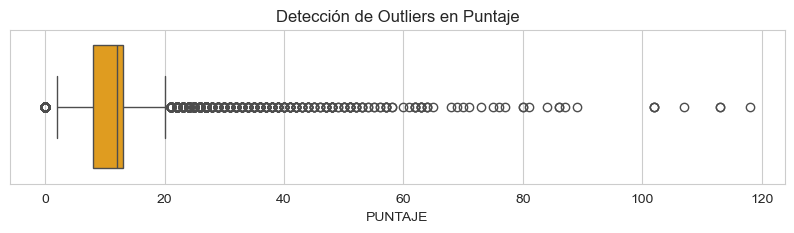

In [12]:
# PASO 7: AUDITORIA DE CALIDAD LOS DATOS
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. TRATAMIENTO DE "FALSOS NULOS": Convertimos todo texto que represente sin datos en NaN 
df_unicos = df_unicos.replace(['(null)', 'null', 'NULL', 'None'], np.nan)

print(f"📂 Analizando {len(df_unicos):,} registros únicos.")
print("-" * 70)

# -------------------------------------------------------------------------
# 7.1. ANÁLISIS DE VALORES FALTANTES
# -------------------------------------------------------------------------
print("\n🕳️ 1. VALORES FALTANTES (NaN):")
nulos = df_unicos.isnull().sum()
nulos = nulos[nulos > 0] # Solo se muestran las columnas que contienen valores nulos

if not nulos.empty:
    # Calculamos el porcentaje de valores nulos 
    porcentaje = (nulos / len(df_unicos)) * 100
    reporte_nulos = pd.DataFrame({'Faltantes': nulos, '% Total': porcentaje})
    print(reporte_nulos.sort_values(by='% Total', ascending=False))
else:
    print("No hay datos nulos en ninguna columna seleccionada.")

print("-" * 70)
# -------------------------------------------------------------------------
# 7.2. AUDITORÍA TEMPORAL (Fecha)
# -------------------------------------------------------------------------
print("\n📅 2. ANÁLISIS TEMPORAL (Años de Inspección):")
conteo_anios = df_unicos['FECHA'].dt.year.value_counts().sort_index()
print(conteo_anios)

print("-" * 70)
# -------------------------------------------------------------------------
# 7.3. AUDITORÍA ESPACIAL (Coordenadas)
# -------------------------------------------------------------------------
print("\n🌍 3. ANÁLISIS ESPACIAL (Coordenadas):")

# Coordenadas que son NaN
sin_coords = df_unicos['LATITUD'].isnull().sum()
# Coordenadas que son 0.0 (error común)
coords_cero = (df_unicos['LATITUD'] == 0).sum()

print(f"-> Restaurantes sin ubicación geografica (NaN): {sin_coords:,}")
print(f"-> Restaurantes con georeferencia (Lat=0): {coords_cero:,}")

print("-" * 70)
# -------------------------------------------------------------------------
# 7.4. AUDITORÍA NUMÉRICA (Puntajes extremos)
# -------------------------------------------------------------------------
print("\n💯 4. DISTRIBUCIÓN DE PUNTAJES:")
print(df_unicos['PUNTAJE'].describe())

# Boxplot de outliers en puntaje
plt.figure(figsize=(10, 2))
sns.boxplot(x=df_unicos['PUNTAJE'], color='orange')
plt.title('Detección de Outliers en Puntaje')
plt.show()


In [13]:
# PASO 8: GESTIÓN DE VALORES VACÍOS (NULLS)

# 1. Verificación valores nulls
print("📊 ESTADO ACTUAL DE VACÍOS:")
print(df_unicos.isnull().sum())
print("-" * 70)

# 2. Limpieza de Valores nulls
print("⏳ Aplicando reglas de negocio...")

# Copia del data frame
df_final = df_unicos.copy()

# A) Primera variable prioritaria (LATITUD y LONGITUD), sin coordenadas no podemos ubicar los restaurantes
filas_antes = df_final.shape[0]
df_final = df_final.dropna(subset=['LATITUD', 'LONGITUD'])
df_final = df_final[df_final['LATITUD'] != 0] #eliminamos las ubicaciones geograficas (0)

filas_borradas = filas_antes - df_final.shape[0]
print(f"📍 Eliminados {filas_borradas} restaurantes por falta de coordenadas (Lat/Lon).")

# B) Segunda Variable prioritaria (CALIFICACION), si no existen valores de CALIFICACION rellenamos Sin Calificación, pero no eliminamos
col_nota = 'CALIFICACION'
if 'CALIFICACION' in df_final.columns:
    if 'Sin Calificación' not in df_final['CALIFICACION'].cat.categories:
        df_final['CALIFICACION'] = df_final['CALIFICACION'].cat.add_categories(['Sin Calificación'])
    
    nulos_nota = df_final['CALIFICACION'].isnull().sum()
    df_final['CALIFICACION'] = df_final['CALIFICACION'].fillna('Sin Calificación')
    print(f"📝 Se etiquetaron {nulos_nota} locales como 'Sin Calificación.'")

# C) Variables Secundarias 
# Cocina: Si no dice nada, ponemos "Variada/Otras"
df_final['COCINA'] = df_final['COCINA'].fillna('Variada/Otras')

# Código Postal: Quitamos decimales (.0) y aseguramos que sea texto
df_final['CODIGO_POSTAL'] = df_final['CODIGO_POSTAL'].replace(['nan', 'None'], np.nan).fillna('00000')

# Violación: Si falta, asumimos que no tienes violaciones registradas
df_final['VIOLACION'] = df_final['VIOLACION'].fillna('Sin Violaciones Registradas')

# Puntaje: Si falta, es 0 (Puntaje Neutro)
df_final['PUNTAJE'] = df_final['PUNTAJE'].fillna(0)

# Edificios y Números: completamos los nulls con S/N (Sin Datos)
if 'NUM_EDIFICIO' in df_final.columns:
    df_final['NUM_EDIFICIO'] = df_final['NUM_EDIFICIO'].fillna('S/N')

if 'ID_EDIFICIO' in df_final.columns:
    df_final['ID_EDIFICIO'] = df_final['ID_EDIFICIO'].fillna('S/N')

print("-" * 70)
# 3. VISUALIZACION DE LA TABLA
print(f"📉 TOTAL FINAL DE RESTAURANTES: {df_final.shape[0]:,}")
print("Verificación de nulos:")
print(df_final.isnull().sum())

print("-" * 70)
display(df_final.head(5))




📊 ESTADO ACTUAL DE VACÍOS:
ID_RESTAURANTE           0
NOMBRE_RESTAURANTE       0
ZONA                     0
NUM_EDIFICIO             0
CALLE                    0
CODIGO_POSTAL            0
LATITUD                 34
LONGITUD                34
COCINA                   0
FECHA                    0
VIOLACION              223
GRAVEDAD                 0
PUNTAJE                247
CALIFICACION          1007
ID_EDIFICIO              0
dtype: int64
----------------------------------------------------------------------
⏳ Aplicando reglas de negocio...
📍 Eliminados 127 restaurantes por falta de coordenadas (Lat/Lon).
📝 Se etiquetaron 997 locales como 'Sin Calificación.'
----------------------------------------------------------------------
📉 TOTAL FINAL DE RESTAURANTES: 6,933
Verificación de nulos:
ID_RESTAURANTE        0
NOMBRE_RESTAURANTE    0
ZONA                  0
NUM_EDIFICIO          0
CALLE                 0
CODIGO_POSTAL         0
LATITUD               0
LONGITUD              0
COCINA  

,ID_RESTAURANTE,NOMBRE_RESTAURANTE,ZONA,NUM_EDIFICIO,CALLE,CODIGO_POSTAL,LATITUD,LONGITUD,COCINA,FECHA,VIOLACION,GRAVEDAD,PUNTAJE,CALIFICACION,ID_EDIFICIO
15687,40359480,1 EAST 66TH STREET KITCHEN,Manhattan,1,EAST 66 STREET,10065,40.768547,-73.969581,American,2025-12-02,Dishwashing and ware washing: Cleaning and san...,Not Critical,10.0,A,1041159
1440,40362264,P & S DELI GROCERY,Manhattan,730,COLUMBUS AVENUE,10025,40.792621,-73.967710,American,2025-03-27,"Wiping cloths not stored clean and dry, or in ...",Critical,13.0,A,1082743
7005,40362274,ANGELIKA FILM CENTER,Manhattan,18,WEST HOUSTON STREET,10012,40.725744,-73.997478,American,2023-06-21,Single service article not provided. Single se...,Not Critical,11.0,A,1008240
50679,40363298,CAFE METRO,Manhattan,625,8 AVENUE,10018,40.756185,-73.990565,American,2025-05-01,"Food contact surface not properly washed, rins...",Critical,13.0,A,1083268
13804,40364347,METROPOLITAN CLUB,Manhattan,1,EAST 60 STREET,10022,40.764796,-73.972308,American,2024-10-29,"Food contact surface not properly washed, rins...",Critical,8.0,A,1081206


In [16]:
# PASO 9: FILTRO TEMPORAL Y DEFINICIÓN DE VARIABLE ESTRATÉGICA

# 1. Filtro de Fecha: seleccionamos solo las inspecciones mas recientes a partir del año 2023
df_final = df_final[df_final['FECHA'].dt.year >= 2023].copy()

# 2. Creación de Variable 'TIPO_COMPETENCIA'
# Clasificamos los restaurantes según: Rivales Directos vs Generadores de Tráfico (Indirecta)
def clasificar_rol(cocina):
    rivales = ['Mexican', 'Tex-Mex', 'Latin American']
    if cocina in rivales:
        return 'Directa (Rivales)'
    else:
        return 'Indirecta (Tráfico)'

df_final['TIPO_COMPETENCIA'] = df_final['COCINA'].apply(clasificar_rol)

# 3. RESULTADOS FINALES
print("-" * 70)
print(f"📊 Total Restaurantes en el estudio: {df_final.shape[0]:,}")
print(f"📅 Rango de fechas: {df_final['FECHA'].min().date()} a {df_final['FECHA'].max().date()}")
print("-" * 70)

# Verificación de la segmentación
print("Distribución del mercado analizado:")
print(df_final['TIPO_COMPETENCIA'].value_counts())


----------------------------------------------------------------------
📊 Total Restaurantes en el estudio: 6,828
📅 Rango de fechas: 2023-01-03 a 2025-12-17
----------------------------------------------------------------------
Distribución del mercado analizado:
TIPO_COMPETENCIA
Indirecta (Tráfico)    6242
Directa (Rivales)       586
Name: count, dtype: int64


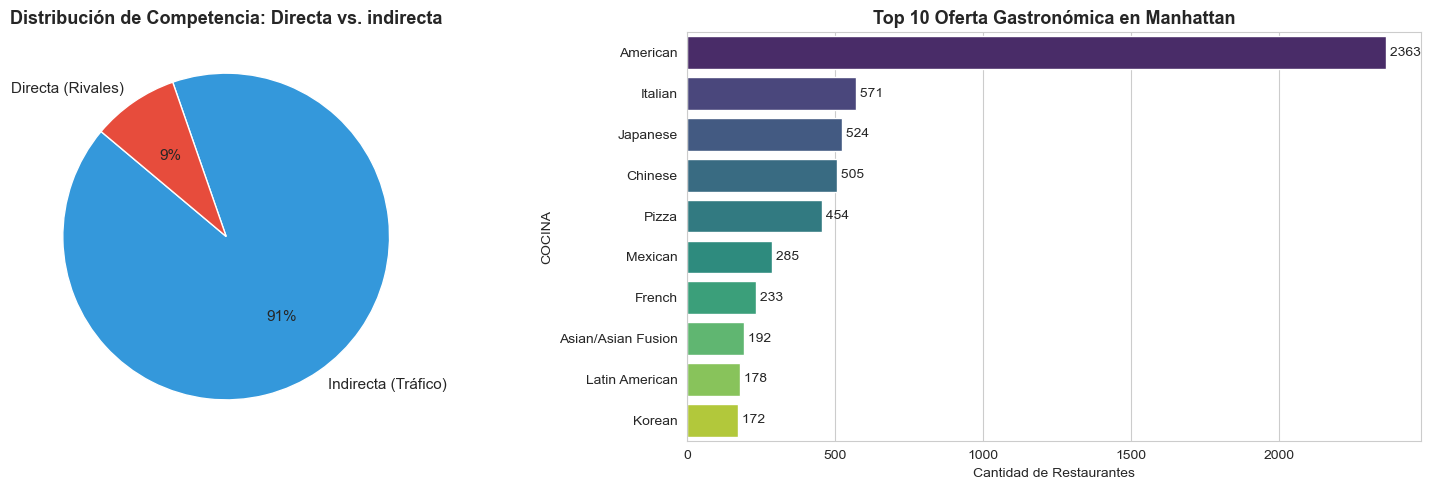

In [20]:
# PASO 10: ANÁLISIS EXPLORATORIO DE DATOS (EDA)

import matplotlib.pyplot as plt #libreria para crear gráficos basicos 
import seaborn as sns #libreria para mejorar es estilo y configuración de los gráficos


# Configuración de estilo y dimensiones
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(16, 5)) #tamaño del lienzo (ancho, alto)

# --- GRÁFICO 1: Pastel - Tipo de Competencia ---
plt.subplot(1, 2, 1) #configuración del gráfico
conteo_comp = df_final['TIPO_COMPETENCIA'].value_counts()

# Colores: Rojo (Competencia) y Azul (Tráfico/Oportunidad)
colores_pie = ['#3498db', '#e74c3c'] 
plt.pie(conteo_comp, labels=conteo_comp.index, autopct='%1.f%%', startangle=140, colors=colores_pie, textprops={'fontsize': 11})
plt.title('Distribución de Competencia: Directa vs. indirecta', fontsize=13, fontweight='bold')

# --- GRÁFICO 2: Barras - Top 10 Tipos de Cocina ---
plt.subplot(1, 2, 2) 

# Seleccion de las 10 cocinas mas comunes en Manhathan
top_cocinas = df_final['COCINA'].value_counts().head(10)
grafico_barras = sns.barplot( x=top_cocinas.values, y=top_cocinas.index, hue=top_cocinas.index, palette="viridis", legend=False )
plt.title('Top 10 Oferta Gastronómica en Manhattan', fontsize=13, fontweight='bold')
plt.xlabel('Cantidad de Restaurantes')

# Etiquetas
for i in range(len(top_cocinas)):
    plt.text(top_cocinas.values[i], i, f' {top_cocinas.values[i]}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

In [19]:
# PASO 11: EXPORTACIÓN FINAL DEL DATASET

import os

# Definición del nombre del archivo y ruta para guardar
carpeta = 'Datos_Limpios'
nombre_archivo = '01_Restaurantes_Manhattan_Limpio.csv'
ruta_completa = os.path.join(carpeta, nombre_archivo)

try:
    # Guardamos el CSV
    # encoding='utf-8-sig' para lectura de acentos
    df_final.to_csv(ruta_completa, index=False, encoding='utf-8-sig')
    
    print(f"\n💾 ¡EXPORTACIÓN EXITOSA!")
    print("-" * 70)
    print(f"📂 Archivo guardado en: {ruta_completa}")
    print(f"📊 Filas exportadas: {df_negocio.shape[0]:,}")

except Exception as e:
    print(f"❌ Error al guardar el archivo: {e}")


💾 ¡EXPORTACIÓN EXITOSA!
----------------------------------------------------------------------
📂 Archivo guardado en: Datos_Limpios\01_Restaurantes_Manhattan_Limpio.csv
❌ Error al guardar el archivo: name 'df_negocio' is not defined
